# Project Goals

# Data Dictionary
- gender: is the customer male or female?
- senior_citizen: is the customer a senior citizen? 1 for yes, 0 for no.
- partner: does the customer have a partner?
- dependents: does the customer have dependents?
- tenure: Number of months the customer has had one of our services. 0 would mean they haven't been with us a full month yet.
- phone_service: does the customer have phone service?
- multiple_lines: does the customer have multiple lines? yes, no, or no phone service.
- internet_service_type_id: id of type of internet service.
- online_security: does the customer utilize the option of having a password.
- online_backup: does the customer utilize the option to backup their files?
- device_protection: does the customer utilize the option to protect their internet device (i.e. router)?
- tech_support: does the customer utilize the option to talk to tech support?
- streaming_tv: does the customer have the tv streaming service?
- streaming_movies: does the customer have the movie streaming service?
- contract_type_id: id of type of contract.
- paperless_billing: customer using paperless billing option?
- payment_type_id: id of type of payment.
- monthly_charges: Most recent monthly charge for that customer.
- total_charges: Most recent total charges for that customer.
- churn: Did the customer churn?
- contract_type: type of contract.
- internet_service_type: type of internet service.
- payment_type: type of payment.
# <span style="color:red">ADD NEW DEFINITIONS FOR NEW FIELDS (FEATURES AND ENCODED)</span>

# Hypotheses

- The more services the customer has the less likely they are to churn. It would be difficult to switch to another service provider who was able to offer the same service plan.
###### A customer with multiple lines might be less inclined to churn due to having to move all the lines over. Likewise, those with streaming services will be less likely to churn. Basically, the more services a customer has the less likely to churn.


- If a customer is on a family plan they are less likely to churn. It might be difficult to find another plan to fit a larger group of people. The more lines there are the more complicated the switch would end up being.
###### A customers with multiple lines will have a decent effect on whether a customer churns or not.


- If a customer has "security servies"(see feature engineering) they are less likely to churn. Since the customer has access to forms of protection, security, and insurance they feel safer with that provider, and would be less willing to churn.

# <span style="color:red">ADD HYPOTHESIS FROM MATT AND SANDY NOTEBOOK</span>

# Feature Engineering

- Family Plan
    - Dependents
    - Partners
    - Multiple Lines
    - This would be a 0 or 1, and be determined by looking at the partner, dependents, and multiple lines.
- Total Services
    - Phone
    - Internet
    - Fiber
- Security Services
    - Online_Security
    - Device_Protection
    - Online_Backup
- <span style="color:red">It might be a good idea to make a new feature that shows how many services a customer has.</span>

# Other Ideas

- If online backup tells whether a customer uses our service to backup their data, this can be a useful variable in determining churn.
- If tech support is an option, I would think that customers who have that option available are less likely to churn

# Imports

In [1]:
#import modules

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support as pfs
from scipy.stats import ttest_ind
import sklearn.metrics as skm
import graphviz
from graphviz import Graph
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
import io

# import personal files
from prepare import *
# import env #turn this on if the SQL pull is required

# Import CSV

In [2]:
# import files we made i.e. csv's and function files
df = pd.read_csv('telco_full_data.csv')

# Import from SQL
# <span style="color:red">FOR FINAL PRODUCT USE SQL QUERY NOT CSV</span>

In [3]:
# dbc = env.get_connection('telco_churn')
# telco_full = pd.read_sql('SELECT * FROM customers c JOIN contract_types ct\
#                             ON c.contract_type_id = ct.contract_type_id JOIN internet_service_types it\
#                             ON c.internet_service_type_id = it.internet_service_type_id JOIN payment_types pt\
#                             ON c.payment_type_id = pt.payment_type_id', dbc)
# telco_full.head()

In [4]:
df = prep_telco(df)

In [5]:
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
churn,No,No,No,Yes,Yes
tenure,9,9,7,1,1
tenure_year,0.75,0.75,0.58,0.08,0.08
in_tenure_year,1,1,1,1,1
monthly_charges,59.9,69.4,48.2,25.1,30.5
total_charges,542.4,571.45,340.35,25.1,30.5
payment_type,Mailed check,Credit card (automatic),Electronic check,Electronic check,Bank transfer (automatic)
payment_type_id,2,4,1,1,3
contract_type,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month


In [6]:
df.columns

Index(['customer_id', 'churn', 'tenure', 'tenure_year', 'in_tenure_year',
       'monthly_charges', 'total_charges', 'payment_type', 'payment_type_id',
       'contract_type', 'contract_type_id', 'internet_service_type',
       'internet_service_type_id', 'paperless_billing', 'gender',
       'senior_citizen', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'streaming_tv', 'streaming_movies', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'family_plan',
       'household', 'phone_id', 'streaming_services', 'online_security_backup',
       'monthly', 'payment_type_encode', 'internet_service_type_encode',
       'contract_type_encode', 'churn_encode', 'paperless_billing_encode',
       'streaming_movies_encode', 'streaming_tv_encode', 'tech_support_encode',
       'device_protection_encode', 'online_backup_encode',
       'online_security_encode', 'multiple_lines_encode',
       'phone_service_encode', 'dependents_encode', 'gender_encod

In [7]:
df_print_missing_vals(df)


Missing Values:

No missing values


In [8]:
df_print_metadata(df)

DATAFRAME METADATA
Size: 337536

Shape: 7032 x 48

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
customer_id                     7032 non-null object
churn                           7032 non-null object
tenure                          7032 non-null int64
tenure_year                     7032 non-null float64
in_tenure_year                  7032 non-null float64
monthly_charges                 7032 non-null float64
total_charges                   7032 non-null float32
payment_type                    7032 non-null object
payment_type_id                 7032 non-null int64
contract_type                   7032 non-null object
contract_type_id                7032 non-null int64
internet_service_type           7032 non-null object
internet_service_type_id        7032 non-null int64
paperless_billing               7032 non-null object
gender                          7032 non-null object
senior_citizen                  7032 non-

In [9]:
peekatdata(df)

First five rows of the dataframe:
  customer_id churn  tenure  tenure_year  in_tenure_year  monthly_charges  \
0  0003-MKNFE    No       9         0.75             1.0             59.9   
1  0013-MHZWF    No       9         0.75             1.0             69.4   
2  0015-UOCOJ    No       7         0.58             1.0             48.2   
3  0023-HGHWL   Yes       1         0.08             1.0             25.1   
4  0032-PGELS   Yes       1         0.08             1.0             30.5   

   total_charges               payment_type  payment_type_id   contract_type  \
0     542.400024               Mailed check                2  Month-to-month   
1     571.450012    Credit card (automatic)                4  Month-to-month   
2     340.350006           Electronic check                1  Month-to-month   
3      25.100000           Electronic check                1  Month-to-month   
4      30.500000  Bank transfer (automatic)                3  Month-to-month   

       ...        stre

# Family Plan

This variable can be either a 0 or 1. 1 means that the customer is likely part of a family plan, since they have a partner, have dependents, and have mulitple lines.

In [10]:
df.family_plan.value_counts()

0    6287
1     745
Name: family_plan, dtype: int64

#### Exploration

What is the overall churn rate?

In [11]:
overall_churn = df.churn_encode.mean()
overall_churn

0.26578498293515357

##### One way to discover drivers of churn is to find groups within the dataset that have significantly higher or lower rates of churn.

In [12]:
df_encoded = df

##### Looking at 'security options' to check if there is a difference.

##### <span style="color:red"> Consider using a kde plot for this </span>

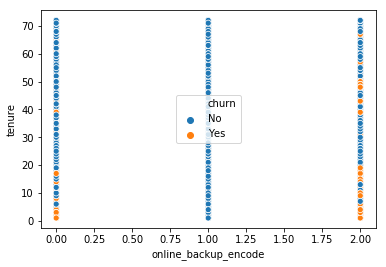

In [13]:
sns.scatterplot(data=df_encoded, x='online_backup_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

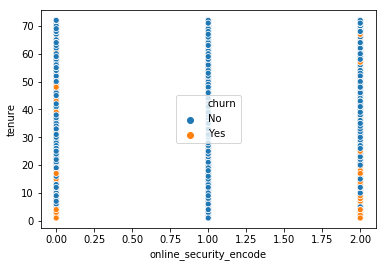

In [14]:
sns.scatterplot(data=df_encoded, x='online_security_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

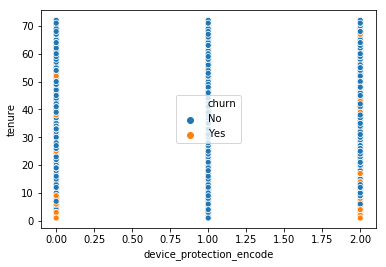

In [15]:
sns.scatterplot(data=df_encoded, x='device_protection_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

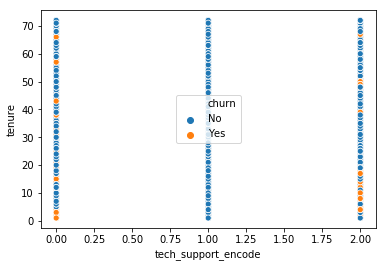

In [16]:
sns.scatterplot(data=df_encoded, x='tech_support_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

In [17]:
df_encoded[['online_backup_encode', 'online_backup']].sample(10)

,online_backup_encode,online_backup
82,0,No
970,2,Yes
25,0,No
6264,1,No internet service
2787,0,No
5668,1,No internet service
3095,0,No
6554,1,No internet service
1964,2,Yes
3278,0,No


##### Looking at this tells me that those customers without internet service seem to be churning less.

In [18]:
df_encoded.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [19]:
df_encoded.groupby('internet_service_type')['churn_encode'].mean()

internet_service_type
DSL            0.189983
Fiber optic    0.418928
None           0.074342
Name: churn_encode, dtype: float64

In [20]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['internet_service_type'].count()

internet_service_type  tech_support       
DSL                    No                     1242
                       Yes                    1174
Fiber optic            No                     2230
                       Yes                     866
None                   No internet service    1520
Name: internet_service_type, dtype: int64

##### While DSL users have a pretty even split of whether they use tech support or not, majority of fiber users do not use tech support.

Can this be a factor in churn? Are fiber users with tech support less likely to churn than those without?

In [21]:
fiber_no_tech = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.tech_support_encode == 0)]
fiber_with_tech = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.tech_support_encode == 2)]

print(fiber_no_tech.churn_encode.mean())
print(fiber_with_tech.churn_encode.mean())

ttest_ind(fiber_no_tech.churn_encode, fiber_with_tech.churn_encode)

0.49372197309417043
0.22632794457274827


Ttest_indResult(statistic=13.950307133580548, pvalue=6.0943037385951464e-43)

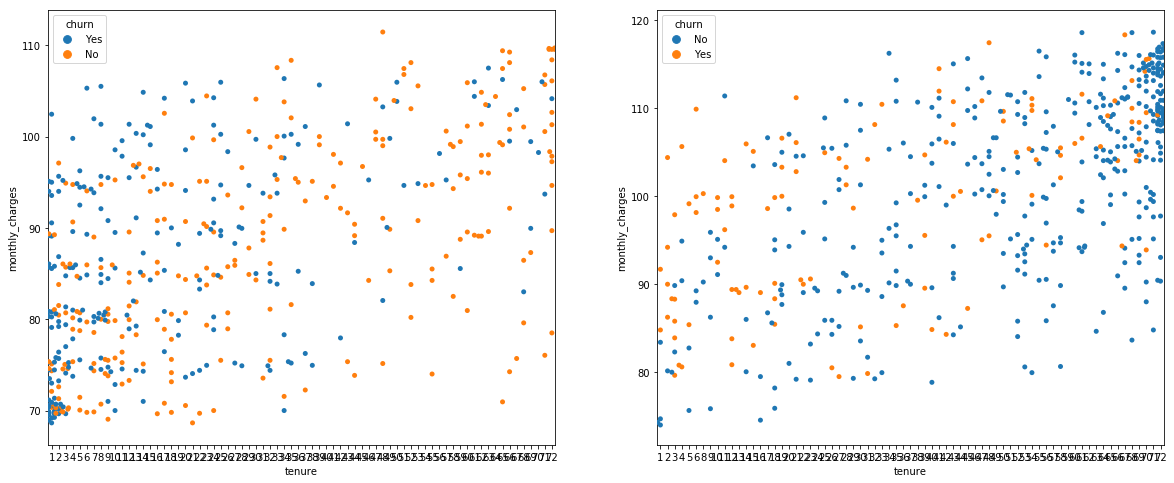

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.swarmplot(data=fiber_no_tech.sample(500), x='tenure', y='monthly_charges', hue='churn',)
plt.subplot(122)
sns.swarmplot(data=fiber_with_tech.sample(500), x='tenure', y='monthly_charges', hue='churn')
plt.show()

##### There is a significant difference in churn rate between fiber users with tech support and fiber users without tech support.

The churn rate for those with tech support is only 23%, actually below the overall churn rate. The churn rate for those without tech support is 49%, almost double the overall churn rate!

What does this say about tech support?

- tech support is an important factor when it comes to a user's decision to churn
- perhaps fiber has technical issues, and those that get it fixed stay, while those that don't leave
- why would some users not utilize tech support? have to pay for it?

A quick look at the average monthly charges shows that those with tech support might be paying more for it. To be sure the other variables need to be accounted for.

In [23]:
print('Average monthly charge for fiber users without tech support: ${:.2f}'
      .format(fiber_no_tech.monthly_charges.mean()))
print('Average monthly charge for fiber users with tech support: ${:.2f}'
      .format(fiber_with_tech.monthly_charges.mean()))

Average monthly charge for fiber users without tech support: $87.74
Average monthly charge for fiber users with tech support: $101.18


In [24]:

print('Average tenure for fiber users without tech support: {:.0f} months'
      .format(fiber_no_tech.tenure.mean()))
print('Average tenure for fiber users with tech support: {:.0f} months'
      .format(fiber_with_tech.tenure.mean()))

Average tenure for fiber users without tech support: 27 months
Average tenure for fiber users with tech support: 48 months


##### An overwhelming amount of fiber users without tech support are on a month to month plan. They are the group with the highest churn rate.

This freedom can help explain why these users are leaving. The users have trouble with fiber and instead of fixing it, they go to someone else.

This also shows that month to month contracts in general churn the most. This isn't surprising, but doesn't explain why are they churning. They aren't churning just because they can. As stated earlier, they are perhaps churning due to lack of tech support. Other variables can also cause people on month to month to churn.

In [25]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['contract_type'].count()

internet_service_type  tech_support         contract_type 
DSL                    No                   Month-to-month     884
                                            One year           244
                                            Two year           114
                       Yes                  Month-to-month     339
                                            One year           326
                                            Two year           509
Fiber optic            No                   Month-to-month    1796
                                            One year           313
                                            Two year           121
                       Yes                  Month-to-month     332
                                            One year           226
                                            Two year           308
None                   No internet service  Month-to-month     524
                                            One year           363
   

In [26]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['churn_encode'].mean()

internet_service_type  tech_support         contract_type 
DSL                    No                   Month-to-month    0.358597
                                            One year          0.098361
                                            Two year          0.035088
                       Yes                  Month-to-month    0.227139
                                            One year          0.088957
                                            Two year          0.015717
Fiber optic            No                   Month-to-month    0.575167
                                            One year          0.185304
                                            Two year          0.082645
                       Yes                  Month-to-month    0.388554
                                            One year          0.203540
                                            Two year          0.068182
None                   No internet service  Month-to-month    0.188931
                  

##### A break to look at the churn rates of the different 'security' variables¶

In [27]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['churn_encode'].mean()

internet_service_type  tech_support       
DSL                    No                     0.277778
                       Yes                    0.097104
Fiber optic            No                     0.493722
                       Yes                    0.226328
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [28]:
df_encoded.groupby(['internet_service_type', 'online_backup'])['churn_encode'].mean()

internet_service_type  online_backup      
DSL                    No                     0.257121
                       Yes                    0.107209
Fiber optic            No                     0.507701
                       Yes                    0.303053
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [29]:
df_encoded.groupby(['internet_service_type', 'online_security'])['churn_encode'].mean()

internet_service_type  online_security    
DSL                    No                     0.279839
                       Yes                    0.095238
Fiber optic            No                     0.493576
                       Yes                    0.218117
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [30]:
df_encoded.groupby(['internet_service_type', 'device_protection'])['churn_encode'].mean()

internet_service_type  device_protection  
DSL                    No                     0.252399
                       Yes                    0.110273
Fiber optic            No                     0.499712
                       Yes                    0.315402
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [31]:
df_encoded[['contract_type_id', 'contract_type']].sample(10)

,contract_type_id,contract_type
2747,1,Month-to-month
784,1,Month-to-month
3934,1,Month-to-month
2237,3,Two year
1846,3,Two year
4690,2,One year
2509,1,Month-to-month
6352,2,One year
1149,1,Month-to-month
3095,1,Month-to-month


### 55% of customers are on month to month contracts.¶

In [32]:
df_encoded.loc[df.contract_type_id == 1].shape[0]/len(df_encoded)

0.551052332195677

In [33]:
df_encoded.loc[df.contract_type_id == 1]['churn_encode'].mean()

0.4270967741935484

We can't just get rid of month to month contracts though. This will cause the company to be less competitive, plus those MtM customers might only be with us because we offer MtM. If we take it away, there is no guarantee that they will switch to a contract.

### Checking senior citizen rate.

##### 16% of customers are senior citizens.¶

In [34]:
df_encoded.senior_citizen.mean()

0.16240045506257111

In [35]:
df_encoded.loc[df.senior_citizen == 1]['churn_encode'].mean()

0.4168126094570928

In [36]:
df_encoded.loc[df.senior_citizen == 0]['churn_encode'].mean()

0.2365025466893039

## 42% of senior citizens churn
While only 24% of those who aren't senior citizens do the same.

This doesn't mean we should ban senior citizens. Instead, why are senior citizens churning at such a high rate?

First, what does it mean for a senior citizen to churn? Hopefully they don't just die, but that's a possibility. The preferable way to think is that they are switching to another company for some reason, but what are those reasons?

- bad service?
- paying more?

Below we look at the group that has fiber without tech support and look at the percentage that are senior citizens.

In [37]:
df_encoded.loc[df_encoded.contract_type_id == 1].groupby('senior_citizen')['senior_citizen'].count()

senior_citizen
0    3068
1     807
Name: senior_citizen, dtype: int64

In [38]:
807/(3068+807)*100

20.825806451612902

21% of customers on MtM are senior citizens

#### 27% of fiber users are senior citizens.¶

In [39]:
df_encoded.groupby(['internet_service_type'])['senior_citizen'].mean()

internet_service_type
DSL            0.107202
Fiber optic    0.268411
None           0.034211
Name: senior_citizen, dtype: float64

##### Almost 30% of fiber users without tech support are senior citizens.¶

In [40]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['senior_citizen'].mean()

internet_service_type  tech_support       
DSL                    No                     0.136876
                       Yes                    0.075809
Fiber optic            No                     0.295964
                       Yes                    0.197460
None                   No internet service    0.034211
Name: senior_citizen, dtype: float64

##### 32% of fiber/no tech support/ month to month users are senior citizens.¶

In [41]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['senior_citizen'].mean().sort_values(ascending=False)

internet_service_type  tech_support         contract_type 
Fiber optic            No                   Month-to-month    0.316258
                                            One year          0.236422
                       Yes                  One year          0.221239
                                            Month-to-month    0.204819
                                            Two year          0.172078
                       No                   Two year          0.148760
DSL                    No                   Month-to-month    0.147059
                                            Two year          0.131579
                                            One year          0.102459
                       Yes                  Month-to-month    0.085546
                                            One year          0.076687
                                            Two year          0.068762
None                   No internet service  One year          0.044077
                  

### Churn rate is high, almost 60%, for senior citizens on fiber without tech and on MtM.

In [42]:
df_encoded.groupby(['internet_service_type', 
                    'tech_support', 
                    'contract_type',
                    'senior_citizen'])['churn_encode'].mean().sort_values(ascending=False)

internet_service_type  tech_support         contract_type   senior_citizen
Fiber optic            No                   Month-to-month  1                 0.598592
                                                            0                 0.564332
DSL                    No                   Month-to-month  1                 0.484615
None                   No internet service  Month-to-month  1                 0.416667
Fiber optic            Yes                  Month-to-month  1                 0.411765
                                                            0                 0.382576
DSL                    No                   Month-to-month  0                 0.336870
                       Yes                  Month-to-month  0                 0.232258
Fiber optic            Yes                  One year        0                 0.204545
                                                            1                 0.200000
                       No                   One year   

### Do senior citizens pay more than non seniors?¶

In [43]:
seniors = df_encoded.loc[df.senior_citizen == 1]
non_seniors = df_encoded.loc[df.senior_citizen == 0]

In [44]:
seniors.loc[seniors.internet_service_type == 'Fiber optic']['monthly_charges'].mean()

91.1859205776173

In [45]:
non_seniors.loc[non_seniors.internet_service_type == 'Fiber optic']['monthly_charges'].mean()

91.6154083885209

### No they don't

# Online Security

In [46]:
df_encoded.groupby('internet_service_type')['online_security_encode'].mean()

internet_service_type
DSL            0.97351
Fiber optic    0.54199
None           1.00000
Name: online_security_encode, dtype: float64

In [47]:
df_encoded.groupby(['internet_service_type', 'online_security'])['internet_service_type'].count()

internet_service_type  online_security    
DSL                    No                     1240
                       Yes                    1176
Fiber optic            No                     2257
                       Yes                     839
None                   No internet service    1520
Name: internet_service_type, dtype: int64

#### While DSL users have a pretty even split of whether they have online security or not, majority of fiber users do not have online security.

Can this be a factor in churn? Are fiber users with online security less likely to churn than those without?

In [48]:
fiber_no_security = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_security == 'No')]
fiber_with_security = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_security == 'Yes')]

print(fiber_no_security.churn_encode.mean())
print(fiber_with_security.churn_encode.mean())

ttest_ind(fiber_no_security.churn_encode, fiber_with_security.churn_encode)

0.4935755427558706
0.21811680572109654


Ttest_indResult(statistic=14.248827588212508, pvalue=1.1449724339614072e-44)

#### There is a significant difference in churn between fiber users with online security and those without.

The group with online security had a 22% churn rate, while those without had a 49% churn rate. This is pretty similar to the churn rates based on tech support. What does this say about online security?

- online security is an important factor for customers

In [49]:
print('Average monthly charge for those without online security: ${:.2f}'.format(fiber_no_security.monthly_charges.mean()))
print('Average monthly charge for those with online security: ${:.2f}'.format(fiber_with_security.monthly_charges.mean()))


Average monthly charge for those without online security: $88.63
Average monthly charge for those with online security: $99.22


Once again, the numbers are similar to those seen comparing tech support.

In [50]:
print('Average tenure for fiber users without online security: {:.0f} months'
      .format(fiber_no_security.tenure.mean()))
print('Average tenure for fiber users with online security: {:.0f} months'
      .format(fiber_with_security.tenure.mean()))


Average tenure for fiber users without online security: 27 months
Average tenure for fiber users with online security: 48 months


I am starting to think that tech support and online security might be "packaged" together in some way.

In [51]:
df_encoded[['online_security_encode', 'tech_support_encode', 'device_protection_encode', 'online_backup_encode']].corr()

,online_security_encode,tech_support_encode,device_protection_encode,online_backup_encode
online_security_encode,1.000000,0.284875,0.175789,0.184942
tech_support_encode,0.284875,1.000000,0.240476,0.195581
device_protection_encode,0.175789,0.240476,1.000000,0.187646
online_backup_encode,0.184942,0.195581,0.187646,1.000000


There is some correlation but not very strong.

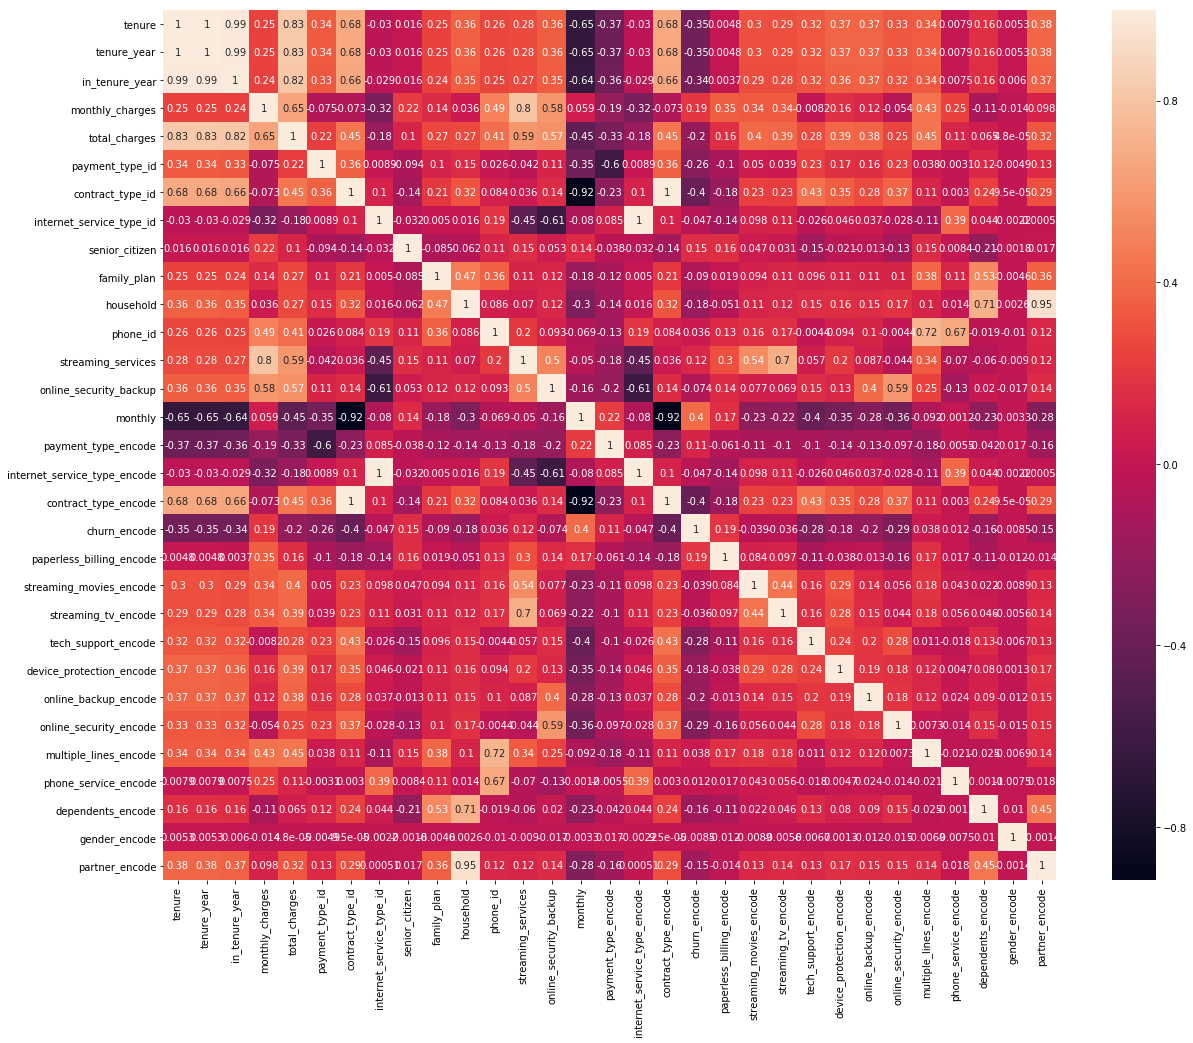

In [52]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True)

#### Once again, month to month jumps out as being the largest group based on contracts within out fiber users without online security.

In [53]:
df_encoded.groupby(['internet_service_type', 'online_security', 'contract_type'])['contract_type'].count()

internet_service_type  online_security      contract_type 
DSL                    No                   Month-to-month     857
                                            One year           240
                                            Two year           143
                       Yes                  Month-to-month     366
                                            One year           330
                                            Two year           480
Fiber optic            No                   Month-to-month    1774
                                            One year           317
                                            Two year           166
                       Yes                  Month-to-month     354
                                            One year           222
                                            Two year           263
None                   No internet service  Month-to-month     524
                                            One year           363
   

##### Online Backup

In [54]:
df_encoded[['online_security_encode', 'tech_support_encode', 'device_protection_encode', 'online_backup_encode']].corr()

,online_security_encode,tech_support_encode,device_protection_encode,online_backup_encode
online_security_encode,1.000000,0.284875,0.175789,0.184942
tech_support_encode,0.284875,1.000000,0.240476,0.195581
device_protection_encode,0.175789,0.240476,1.000000,0.187646
online_backup_encode,0.184942,0.195581,0.187646,1.000000


In [55]:
df_encoded.groupby(['internet_service_type', 'online_backup'])['online_backup_encode'].count()

internet_service_type  online_backup      
DSL                    No                     1334
                       Yes                    1082
Fiber optic            No                     1753
                       Yes                    1343
None                   No internet service    1520
Name: online_backup_encode, dtype: int64

In [56]:
fiber_no_backup = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_backup == 'No')]
fiber_with_backup = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_backup == 'Yes')]

print(fiber_no_backup.churn_encode.mean())
print(fiber_with_backup.churn_encode.mean())

ttest_ind(fiber_no_backup.churn_encode, fiber_with_backup.churn_encode)

0.5077010838562465
0.30305286671630677


Ttest_indResult(statistic=11.683880626204676, pvalue=6.799474455449945e-31)

##### Device Protection

In [57]:
df_encoded.groupby('internet_service_type')['device_protection_encode'].mean()

internet_service_type
DSL            0.878311
Fiber optic    0.876615
None           1.000000
Name: device_protection_encode, dtype: float64

In [58]:
df_encoded.groupby(['internet_service_type', 'device_protection'])['device_protection'].count()

internet_service_type  device_protection  
DSL                    No                     1355
                       Yes                    1061
Fiber optic            No                     1739
                       Yes                    1357
None                   No internet service    1520
Name: device_protection, dtype: int64

In [59]:
fiber_no_protection = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.device_protection == 'No')]
fiber_with_protection = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.device_protection == 'Yes')]

print(fiber_no_protection.churn_encode.mean())
print(fiber_with_protection.churn_encode.mean())

ttest_ind(fiber_no_protection.churn_encode, fiber_with_protection.churn_encode)



0.4997124784358827
0.3154016212232867


Ttest_indResult(statistic=10.491964914685964, pvalue=2.4907995587524844e-25)

### All "security" variables seem to play a role on churn rate.

#### Looking at the family_plan variable and exploring the data related to it

In [60]:
df_encoded.groupby('family_plan')['churn_encode'].mean()

family_plan
0    0.279466
1    0.150336
Name: churn_encode, dtype: float64

In [61]:
family_plans = df[df_encoded.family_plan == 1]
all_not_family_plans = df[df_encoded.family_plan == 0]

ttest_ind(family_plans.churn_encode, all_not_family_plans.churn_encode)

Ttest_indResult(statistic=-7.5737959751407065, pvalue=4.088569005293111e-14)

##### Those customers we believe are on a family plan look to be churning less. Those not on a family plan have a 28% churn rate and those on one have a 15% churn rate.

Are there customers that can be on a family plan and are not? This would mean they have a partner and dependents but do not have multiple lines. If so, do they churn at a higher rate than those on a family plan?

In [62]:
part_n_dep = df_encoded.loc[(df.partner == 'Yes') 
               & (df.dependents == 'Yes') 
               & (df.multiple_lines == 'No')]

print(part_n_dep.churn_encode.mean())

ttest_ind(part_n_dep.churn_encode, family_plans.churn_encode)

0.1437125748502994


Ttest_indResult(statistic=-0.37107299548702766, pvalue=0.7106329742692399)

##### At 14% churn rate, there is not a significant difference between the two groups.

What if we expand the criteria? Are there customers that have a partner **OR** dependents that do not have multiple lines? Do they churn at a higher rate?

In [63]:
part_or_dep = df_encoded.loc[((df.partner == 'Yes') 
               | (df.dependents == 'Yes')) 
               & (df.multiple_lines == 'No')]

print(part_or_dep.churn_encode.mean())

ttest_ind(part_or_dep.churn_encode, family_plans.churn_encode)

0.17861557478368356


Ttest_indResult(statistic=1.7019210530311428, pvalue=0.08890181862351523)

##### 18% churn rate for those with partners or dependents but only one line. Not a significant difference. 
The overall difference between family plan customers and everyone else does not seem to be caused by "missed opportunities" for those who could potentially be on a family plan. This subset of customers is still churning less. Possibly paying less per line and thus feel like they are getting more value?

#### Looking at the family_plan variable and exploring the data related to it

In [64]:
df_encoded.groupby('family_plan')['churn_encode'].mean()

family_plan
0    0.279466
1    0.150336
Name: churn_encode, dtype: float64

In [65]:
family_plans = df[df_encoded.family_plan == 1]
all_not_family_plans = df[df_encoded.family_plan == 0]

ttest_ind(family_plans.churn_encode, all_not_family_plans.churn_encode)

Ttest_indResult(statistic=-7.5737959751407065, pvalue=4.088569005293111e-14)

##### Those customers we believe are on a family plan look to be churning less. Those not on a family plan have a 28% churn rate and those on one have a 15% churn rate.

Are there customers that can be on a family plan and are not? This would mean they have a partner and dependents but do not have multiple lines. If so, do they churn at a higher rate than those on a family plan?

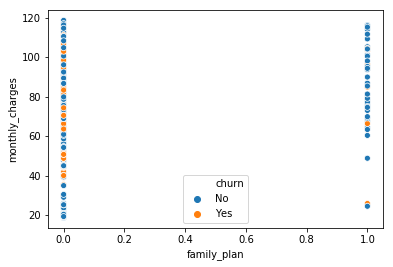

In [66]:
sns.scatterplot(data=df_encoded.sample(500), x='family_plan', y='monthly_charges', hue='churn')

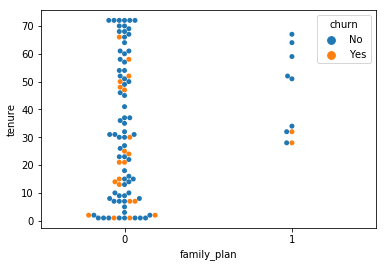

In [67]:
sns.swarmplot(data=df.sample(100), x='family_plan', y='tenure', hue='churn')

## Looking at average monthly charges for those who churn and those who don't

In [68]:
churned = df_encoded[df_encoded.churn_encode == 1]
not_churned = df_encoded[df_encoded.churn_encode == 0]

In [69]:
print(churned.monthly_charges.mean())
print(not_churned.monthly_charges.mean())

ttest_ind(churned.monthly_charges, not_churned.monthly_charges)

74.44133226324234
61.307408483439715


Ttest_indResult(statistic=16.47959313114872, pvalue=6.760843117980302e-60)

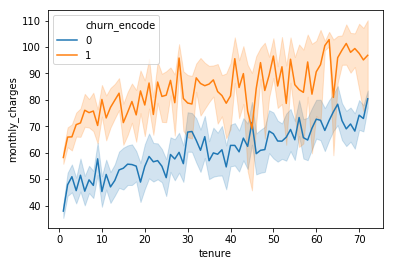

In [70]:
sns.lineplot(data=df_encoded, x='tenure', y='monthly_charges', hue='churn_encode')
plt.show()

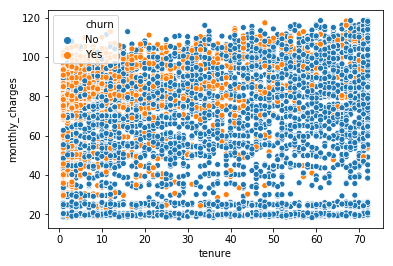

In [71]:
sns.scatterplot(data=df, x='tenure', y='monthly_charges', hue='churn')
plt.show()

# Services

In [72]:
colnames = ['phone_service', 'multiple_lines', 
            'internet_service_type_id','contract_type', 'churn',
           'phone_service_encode', 'multiple_lines_encode',
           'contract_type_encode', 'churn_encode', 'monthly']
df_lines = df[colnames]

In [73]:
df_lines.contract_type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [74]:
df_lines.contract_type = [x.strip().replace(" ", "_") for x in df_lines.contract_type]

In [75]:
df_lines.contract_type.unique()

array(['Month-to-month', 'One_year', 'Two_year'], dtype=object)

In [76]:
x_vars = ['phone_service_encode', 'multiple_lines_encode', 
            'internet_service_type_id','contract_type_encode', 
            'monthly']

X_train, X_test, y_train, y_test = train_test_split(df_lines[x_vars], df_lines['churn_encode'], train_size=0.7, random_state=123)
print('X_train.info():')
print(X_train.info())
print()
print('X_test.info():')
print(X_test.info())
print()
print('y_train.shape = ', y_train.shape)
print()
print('y_test.shape = ', y_test.shape)
print()

X_train.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 5 columns):
phone_service_encode        4922 non-null int64
multiple_lines_encode       4922 non-null int64
internet_service_type_id    4922 non-null int64
contract_type_encode        4922 non-null int64
monthly                     4922 non-null int64
dtypes: int64(5)
memory usage: 230.7 KB
None

X_test.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 6829 to 3849
Data columns (total 5 columns):
phone_service_encode        2110 non-null int64
multiple_lines_encode       2110 non-null int64
internet_service_type_id    2110 non-null int64
contract_type_encode        2110 non-null int64
monthly                     2110 non-null int64
dtypes: int64(5)
memory usage: 98.9 KB
None

y_train.shape =  (4922,)

y_test.shape =  (2110,)



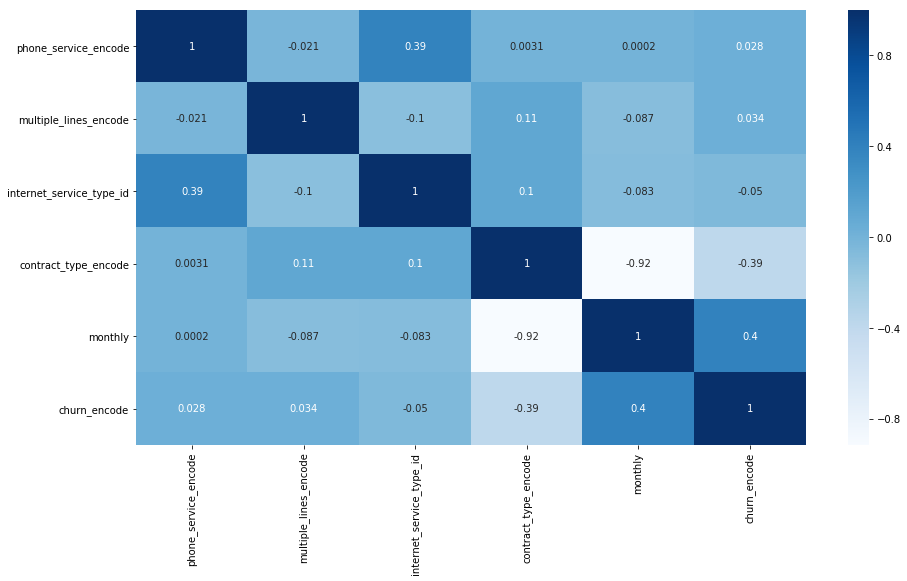

In [77]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), cmap="Blues", annot=True)
plt.show()

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 5 columns):
phone_service_encode        4922 non-null int64
multiple_lines_encode       4922 non-null int64
internet_service_type_id    4922 non-null int64
contract_type_encode        4922 non-null int64
monthly                     4922 non-null int64
dtypes: int64(5)
memory usage: 230.7 KB


In [79]:
X_train.head()

,phone_service_encode,multiple_lines_encode,internet_service_type_id,contract_type_encode,monthly
463,1,0,1,0,1
5822,1,2,3,0,1
1432,1,0,1,1,0
2890,1,2,2,0,1
3911,1,2,2,0,1


In [80]:
def df_print_r_and_p_values(X, y):
    r_and_p_values = {col: stats.pearsonr(X[col], y) for col in X.columns}
    print("PEARSON'S R")
    for k, v in r_and_p_values.items():
        col = k
        r, p = v
        print(f"{col}:")
        print(f"\tPearson's R is {r:.2f} ")
        print(f"\twith a significance p-value of {p: .3}\n")


# Nothing interesting showing up here... 
df_print_r_and_p_values(X_train[x_vars], y_train)

PEARSON'S R
phone_service_encode:
	Pearson's R is 0.03 
	with a significance p-value of  0.0497

multiple_lines_encode:
	Pearson's R is 0.03 
	with a significance p-value of  0.0168

internet_service_type_id:
	Pearson's R is -0.05 
	with a significance p-value of  0.000441

contract_type_encode:
	Pearson's R is -0.39 
	with a significance p-value of  1.17e-178

monthly:
	Pearson's R is 0.40 
	with a significance p-value of  3.02e-187



#### Is the churn rate significantly different for month-to-month contracts vs those with 2-year contracts?

In [81]:
df_train = pd.concat([X_train, y_train], axis=1)

# A t score of 28.7 means the group of two-year contracts is 
# 28.7 standard deviations from the mean of the group with 
# month-to-month contracts.

# - The larger the t statistic, the more difference there is between 
#   the groups, the more likely it is that the results are repeatable, 
#   i.e. that the difference is significant.

# - The smaller the score, the more similarity.

# So this shows that the month-to-month and 2-year contract groups are 
# significantly different from each other. So I need to group the number 
# of contracts with that aggragate. 


# Try various comparisons to see which are most significant.
month_to_month = df_train[df_train.contract_type_encode == 0].churn_encode
two_year = df_train[df_train.contract_type_encode == 2].churn_encode
print(stats.ttest_ind(month_to_month.values, two_year.values))

Ttest_indResult(statistic=26.576791550438063, pvalue=3.998149187664793e-143)


In [82]:
one_year = df_train[df_train.contract_type_encode == 1].churn_encode
print(stats.ttest_ind(month_to_month.values, one_year.values))

Ttest_indResult(statistic=18.70914591334097, pvalue=1.002085969440357e-74)


In [83]:
one_or_two_year = df_train[df_train.contract_type_encode > 0].churn_encode
print(stats.ttest_ind(month_to_month.values, one_or_two_year.values))

Ttest_indResult(statistic=30.496427035202135, pvalue=3.0176369195521845e-187)


In [84]:
print(stats.ttest_ind(one_year.values, two_year.values))

Ttest_indResult(statistic=7.619470317053519, pvalue=3.7396902119779775e-14)


In [85]:
month_or_two = df_train[(df_train.contract_type_encode == 0) | (df_train.contract_type_encode == 2)].churn_encode
print(stats.ttest_ind(one_year.values, month_or_two.values))

Ttest_indResult(statistic=-12.462169734084801, pvalue=4.049974223456634e-35)


In [86]:
month_or_one = df_train[(df_train.contract_type_encode == 0) | (df_train.contract_type_encode == 1)].churn_encode
print(stats.ttest_ind(two_year.values, month_or_one.values))

Ttest_indResult(statistic=-21.781063315898198, pvalue=1.7140169188800316e-100)


# The month-to-month contracts are 30.5 standard deviations from the mean of the group with one- or two-year contracts.

### Try logistic regression on all independent variables

# <span style="color:red">First Model</span>

##### Create the logistic regression object

In [87]:
# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

##### Fit the model to the training data

In [88]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

##### Print the coefficients and intercept of the model

In [89]:
print('Coefficient: \n', logit.coef_)
print()
print('Intercept: \n', logit.intercept_)
print()

Coefficient: 
 [[ 0.4086848   0.21777786 -0.13696493 -1.36299     0.40528568]]

Intercept: 
 [-0.33149603]



##### Estimate whether or not a customer would churn, using the training data

In [90]:
y_pred = logit.predict(X_train)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

Also need to use this model to predict churn (1=churn, 0=not_churn) of original data file and add that column along with customer_id and probability of churn.

##### Estimate the probability of a customer churning, using the training data

In [91]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.41447177, 0.58552823],
       [0.3758653 , 0.6241347 ],
       [0.8057717 , 0.1942283 ],
       ...,
       [0.8057717 , 0.1942283 ],
       [0.34432025, 0.65567975],
       [0.34432025, 0.65567975]])

In [92]:
# This is not right!!!
# y_pred_df = logit.predict(df['phone_service_encode', 'multiple_lines_encode', 'internet_service_type_id', 'contract_type_encode', 'monthly'])

In [93]:
# df1.merge(df2, left_on='lkey', right_on='rkey')

y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0
0,1
1,1
2,0
3,1
4,1


In [94]:
y_pred_proba_df = pd.DataFrame(y_pred_proba)
y_pred_proba_df.head()


# pd.DataFrame(data=data[1:,1:],    # values
# ...              index=data[1:,0],    # 1st column as index
# ...              columns=data[0,1:]) 

,0,1
0,0.414472,0.585528
1,0.375865,0.624135
2,0.805772,0.194228
3,0.344320,0.655680
4,0.344320,0.655680


#### Evaluate Model
##### Compute the accuracy

In [95]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.65


In [96]:
logit.score(X_train, y_train)
# at 70% split, 0.6529865908167412

0.6529865908167412

##### Create a confusion matrix

In [97]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,2075,1550
Actual +,158,1139


##### Compute Precision, Recall, F1-score, and Support

In [98]:
tp = confusion_df.loc['Actual +', 'Pred +']
fn = confusion_df.loc['Actual +', 'Pred -']
fp = confusion_df.loc['Actual -', 'Pred +']
tn = confusion_df.loc['Actual -', 'Pred -']

recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (recall + precision) / 2
support = tp + fn

print('recall:    %.2f' % recall)
print('precision: %.2f' % precision)
print('f1:        %.2f' % f1)
print('support:   %4d' % support)

recall:    0.88
precision: 0.42
f1:        0.65
support:   1297


In [99]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3625
           1       0.42      0.88      0.57      1297

   micro avg       0.65      0.65      0.65      4922
   macro avg       0.68      0.73      0.64      4922
weighted avg       0.80      0.65      0.67      4922



#### Test Model
##### Compute the accuracy of the model when run on the test data

In [100]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.66


#### Visualize Model

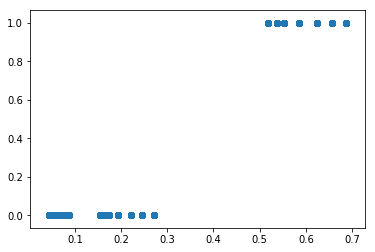

In [101]:
## verify
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

##### I was getting identical results when running with all the dependent variables as I did when running it with only the monthly column, so I tried changing the percentage of test/train split. My accuracy should have gone down, but it went slightly up. And the accuracies between the two models stayed identical. ????

#### Try logistic regression on only 
#### data grouped into month-to-month vs one or two-year contracts.

# <span style="color:red">Second Model</span>

In [103]:
month_to_month = df_train[df_train.contract_type_encode == 0].churn_encode
one_or_two_year = df_train[df_train.contract_type_encode > 0].churn_encode
print(stats.ttest_ind(month_to_month.values, one_or_two_year.values))

Ttest_indResult(statistic=30.496427035202135, pvalue=3.0176369195521845e-187)


In [105]:
month_train = X_train[['monthly']]
month_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 1 columns):
monthly    4922 non-null int64
dtypes: int64(1)
memory usage: 76.9 KB


#### The probabilities are identical, so checking another variable...
##### just phone_service against churn

In [107]:
logit2 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
print(logit2.fit(month_train, y_train))
print('Coefficient: \n', logit2.coef_)
print()
print('Intercept: \n', logit2.intercept_)

y_pred2 = logit2.predict(month_train)
y_pred_proba2 = logit2.predict_proba(month_train)
X_train['prediction'] = logit2.predict(month_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient: 
 [[2.25616013]]

Intercept: 
 [-1.87388411]


In [108]:
logit2.score(X_train[['monthly']], y_train)

0.6529865908167412

In [109]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, X_train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,2075,1550
Actual +,158,1139


In [111]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3625
           1       0.42      0.88      0.57      1297

   micro avg       0.65      0.65      0.65      4922
   macro avg       0.68      0.73      0.64      4922
weighted avg       0.80      0.65      0.67      4922



#### The probabilities are identical, so checking another variable...
##### just phone_service against churn